# Project 3: The relationship between Mental and Physical Health in Texas Counties

## SDS348 Spring 2021

### Taylor Gardiner tpg422

*For my project, I chose to analyze the way that mental health affects physical health throughout the state of Texas. I have always been interested in the multi-faceted effects of mental health and their lasting impact on overall health. I acquired my datasets through countyhealthrankings.org and limited my data to Texas because I wanted to keep my research local. I used four datasets that I believe created a fairly comprehensive look at mental and physical well-being. The first dataset I used contained information about the average number of poor mental health days in the last 30 days for adults over the age of 20, separated by county. The second dataset I used contained information about the average number of poor physical health days in the last 30 days for adults over the age of 20, separated by county. The third dataset I used showed the percentage of adults over 20 who reported no physical activity, separated by county. The fourth dataset I used showed the percentage of adults over 20 who report a BMI greater than or equal to 30 kg/m^2, also separated by county. Each dataset also contained data about the z-score and error margin associated with each county value. I expect to see that counties that report higher numbers of poor mental health days to also report higher numbers of poor physical health days, higher incidence of physical inactivity, and higher rates of obesity. I expect to see this because mental health can greatly impact an individual’s diet and tendency to exercise. I had to tidy the data to join the columns together and create a new categorical variable. I also had to remove the percentage signs from the inactivity and obesity percentage data. This resulted in the dataset I used for Project 1 and Project 2 and will be using for this project as well.*

In [16]:
# Import packages
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

### Importing the Dataset

To start, I first imported my dataset and took a look at it using the head function. 

In [4]:
# Import dataset
fulldataset = pd.read_csv("fulldataset.csv", index_col=0)

In [5]:
fulldataset.head(6)

,pmhd,pphd,obesity_percent,inactivity_percent,obesity_level,Unnamed: 6
County,,,,,,
1,Anderson,4.0,3.9,37,23,med
2,Andrews,3.7,3.6,35,26,med
3,Angelina,4.3,4.1,41,35,high
4,Aransas,4.3,4.1,41,36,high
5,Archer,3.8,3.4,27,19,low
6,Armstrong,3.6,3.1,29,23,low


*Unfortunately, when I imported my dataset, the variable titles shifted over, causing the county names to be labeled as "pmhd" and poor mental health days to be labeled as "pphd". I will take this into account going forward. Using the head function allows me to look at the first 6 rows of my full project dataset. This dataset has 6 variables: County name, average number of poor mental health days in the last 30 days, average number of poor physical health days in the last 30 days, percent of adults with an obese BMI, percent of adults reporting inactivity, and a categorical variable that quantifies counties with obesity percentages over 40% as high, between 30% and 40% as medium, and below 30% as low.*

In [6]:
# Number of observations
fulldataset.info

<bound method DataFrame.info of             pmhd  pphd  ...  obesity_level  Unnamed: 6
County                  ...                           
1       Anderson   4.0  ...             23         med
2        Andrews   3.7  ...             26         med
3       Angelina   4.3  ...             35        high
4        Aransas   4.3  ...             36        high
5         Archer   3.8  ...             19         low
...          ...   ...  ...            ...         ...
250         Wood   4.0  ...             32         low
251       Yoakum   3.9  ...             28         med
252        Young   4.2  ...             29         med
253       Zapata   4.5  ...             20         med
254       Zavala   4.9  ...             20         low

[254 rows x 6 columns]>

*It can be seen that there are 254 observations on my 6 variables.*

### Exploratory Data Analysis

To explore my dataset, I wanted to find the mean and standard deviation of poor mental health days and the frequency counts of my obesity level variable. I also wanted to represent this data visually and did so via a histogram for my mental health data and a bar graph for my obesity level data.

In [13]:
# Descriptive statistics for poor mental health data
np.mean(fulldataset.pphd)

4.0598425196850405

In [14]:
np.std(fulldataset.pphd)

0.2677582181538537

*Because my data is shifted, I had to use the "pphd" column title for my poor mental health data. The mean poor mental health days across Texas counties is 4.06 days. The standard deviation of poor mental health days across Texas counties is .27 days.

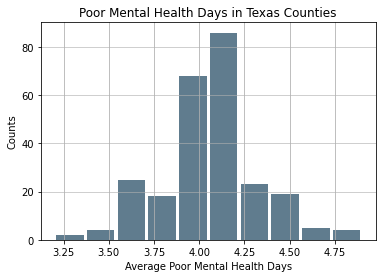

In [18]:
# Visualizing poor mental health with a histogram
fulldataset.pphd.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Poor Mental Health Days in Texas Counties')
plt.xlabel('Average Poor Mental Health Days')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

*It can be seen from the histogram that my poor mental health data is relatively normal and symmetrical. It can also be seen that most counties have an average poor mental health days value between 4.00 and 4.25.*

In [23]:
# Renaming unnamed variable as obesitylevel due to shift
fulldataset.rename(columns={'Unnamed: 6':'obesitylevel'}, inplace=True)
fulldataset.head(6)

,pmhd,pphd,obesity_percent,inactivity_percent,obesity_level,obesitylevel
County,,,,,,
1,Anderson,4.0,3.9,37,23,med
2,Andrews,3.7,3.6,35,26,med
3,Angelina,4.3,4.1,41,35,high
4,Aransas,4.3,4.1,41,36,high
5,Archer,3.8,3.4,27,19,low
6,Armstrong,3.6,3.1,29,23,low


In [24]:
# Descriptive statistics for obesity level data
fulldataset['obesitylevel'].value_counts()

med     127
low     107
high     20
Name: obesitylevel, dtype: int64

*First, I had to rename my variable because it was imported as an unnamed column. After I did that, I found the number of counties in each obesity level. There are 107 counties in the "low" obesity category, 127 in the "medium" category, and 20 in the "high" category.*

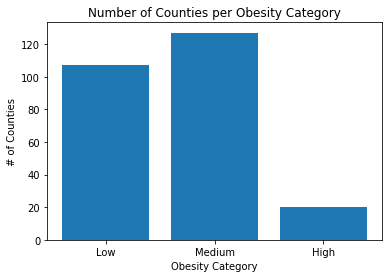

In [26]:
# Visualizing my obesity level data with a bar graph
level = ['Low','Medium','High']
count = [107,127,20]

plt.bar(level,count)
plt.title('Number of Counties per Obesity Category')
plt.xlabel('Obesity Category')
plt.ylabel('# of Counties')
plt.show()

*This bar chart allowed me to visually analyze the distribution of counties amongst the three obesity categories.*